# OBJECTIVE #

1.   <b>APPLYING DECISION TREE WITH BOW VECTORIZATION

 *   FINDING THE BEST HYPERPARAMETER USING GRIDSEARCHCV WITH TRAIN DATA AND CROSS-VALIDATION DATA BY PLOTTING THE RESLUTS OF VAROIUS TRAIN DATA AND CROSS VALIDATION DATA
 * USING THE APROPRIATE VALUE OF HYPERPARAMETER ,TESTING ACCURACY ON TEST DATA
    USING F1-SCORE
 * PLOTTING THE CONFUSION MATRIX TO GET THE  PRECISOIN ,RECALL VALUE WITH HELP OF HEATMAP
  * PRINTING THE TOP 30 MOST IMPORTANT  FEATURES </i></u>
  


In [0]:
from sklearn.model_selection import train_test_split          #importing the necessary libraries
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import *
from sklearn import naive_bayes
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import pandas as pd
from sklearn import *
import warnings
warnings.filterwarnings("ignore")
from sklearn.tree import DecisionTreeClassifier


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')#geeting the content from the google drive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
final_processed_data=pd.read_csv("gdrive/My Drive/final_new_data.csv")#loading the preprocessed data  with 100k points into dataframe 

In [4]:
# getting the counts of 0 and 1 in "SCORE" column to know whether it is unbalanced data or not
count_of_1=0
count_of_0=0
for i in final_processed_data['Score']:
   if i==1:
    count_of_1+=1
   else:
    count_of_0+=1
print(count_of_1)
print(count_of_0)
#it is an imbalanced dataset

88521
11479


In [0]:
#spliiting the data into train and test data
x_train,x_test,y_train,y_test=model_selection.train_test_split(final_processed_data['CleanedText'].values,final_processed_data['Score'].values,test_size=0.2,shuffle=False)

In [6]:
vectorizer=CountVectorizer(min_df=2)#building the vertorizer with word counts equal and more then 2
train_bow=vectorizer.fit_transform(x_train)#fitting the model on training data
print(train_bow.shape)


(80000, 17204)


In [7]:
test_bow=vectorizer.transform(x_test)#fitting the bow model on test data
print("shape of x_test after bow vectorization ",test_bow.shape)

shape of x_test after bow vectorization  (20000, 17204)


In [0]:
#using time series split method for cross-validation score
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5) 
from sklearn.tree import DecisionTreeClassifier




In [10]:
#biudling the model

dt=DecisionTreeClassifier(criterion='gini', splitter='best',class_weight={1:.5,0:.5})
tuned_parameters=[{'max_depth':[5,7,10,15,50],'min_samples_split':[5,25,50,100,500]}]
#applying the model of decision tree and using gridsearchcv to find the best hyper parameter
%time
from sklearn.model_selection import GridSearchCV
model = GridSearchCV(dt, tuned_parameters, scoring = 'f1', cv=tscv,n_jobs=-1)#building the gridsearchcv model


CPU times: user 22 µs, sys: 3 µs, total: 25 µs
Wall time: 1.47 ms


In [11]:
%%time
model.fit(train_bow, y_train)#fiitting the training data


CPU times: user 3.45 s, sys: 183 ms, total: 3.63 s
Wall time: 3min 27s


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
       error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight={1: 0.5, 0: 0.5}, criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'max_depth': [5, 7, 10, 15, 50], 'min_samples_split': [5, 25, 50, 100, 500]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [12]:
print(model.best_estimator_)#printing the best_estimator

DecisionTreeClassifier(class_weight={1: 0.5, 0: 0.5}, criterion='gini',
            max_depth=10, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=50,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [13]:
print(model.score(test_bow,y_test))#checking the score on test_Data 

0.9356330594700474


In [26]:
results=pd.DataFrame(model.cv_results_)# getting varoius cv_scores and train_scores various values of hyperparameter given as parameter and storing it in a dataframe
results#printing the dataframe

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,param_min_samples_split,params,rank_test_score,split0_test_score,split0_train_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.827509,0.024285,0.942337,0.945712,5,5,"{'max_depth': 5, 'min_samples_split': 5}",18,0.946241,0.944234,...,0.944196,0.945741,0.939547,0.945626,0.938655,0.945705,0.364669,0.001138,0.002848,0.000956
1,0.816876,0.023738,0.942328,0.945687,5,25,"{'max_depth': 5, 'min_samples_split': 25}",19,0.945954,0.944196,...,0.944234,0.945715,0.939633,0.945605,0.938693,0.945680,0.354794,0.000926,0.002753,0.000963
2,0.808890,0.024651,0.942459,0.945584,5,50,"{'max_depth': 5, 'min_samples_split': 50}",17,0.946452,0.944006,...,0.944238,0.945626,0.939633,0.945424,0.939095,0.945627,0.354702,0.002119,0.002778,0.001024
3,0.795021,0.023996,0.942528,0.945235,5,100,"{'max_depth': 5, 'min_samples_split': 100}",16,0.946434,0.942481,...,0.944234,0.945572,0.939633,0.945424,0.939095,0.945627,0.358433,0.001055,0.002788,0.001501
4,0.740037,0.023346,0.942653,0.944246,5,500,"{'max_depth': 5, 'min_samples_split': 500}",15,0.948238,0.941464,...,0.942812,0.944401,0.939717,0.944253,0.939432,0.944626,0.326160,0.001006,0.003174,0.001608
5,1.142660,0.024244,0.943008,0.948344,7,5,"{'max_depth': 7, 'min_samples_split': 5}",7,0.946372,0.948853,...,0.944395,0.947863,0.940565,0.948171,0.940268,0.947550,0.538070,0.001451,0.002320,0.000637
6,1.125915,0.024061,0.942797,0.948183,7,25,"{'max_depth': 7, 'min_samples_split': 25}",13,0.946283,0.948649,...,0.944172,0.947689,0.940318,0.948089,0.939639,0.947406,0.516512,0.001015,0.002481,0.000613
7,1.096828,0.023543,0.942704,0.947969,7,50,"{'max_depth': 7, 'min_samples_split': 50}",14,0.946038,0.948265,...,0.944324,0.947568,0.940214,0.947683,0.939596,0.947247,0.492712,0.001106,0.002450,0.000646
8,1.074786,0.024038,0.942902,0.947405,7,100,"{'max_depth': 7, 'min_samples_split': 100}",10,0.946379,0.946321,...,0.944442,0.947408,0.940413,0.947541,0.939768,0.947247,0.504892,0.000729,0.002484,0.000698
9,0.964208,0.023310,0.942856,0.945233,7,500,"{'max_depth': 7, 'min_samples_split': 500}",12,0.947858,0.943013,...,0.942801,0.945525,0.940227,0.945380,0.940329,0.945510,0.431120,0.000905,0.002770,0.001214


In [0]:
results['mean_train_score']=results['mean_train_score']*100
results['mean_test_score']=results['mean_test_score']*100

In [0]:
results=results.round(decimals=2)

In [0]:
results['mean_test_score']=100-results['mean_test_score']

# PLOTTING THE HEATMAP WITH  HYPERPARAMETERS FOR CV_ERROR SCORE 

In [0]:
test_score_heatmap=results.pivot(	'param_max_depth'	,'param_min_samples_split','mean_test_score'	)

In [34]:
test_score_heatmap

param_min_samples_split,5,25,50,100,500
param_max_depth,,,,,
5,5.77,5.77,5.75,5.75,5.73
7,5.70,5.72,5.73,5.71,5.71
10,5.68,5.67,5.66,5.69,5.70
15,5.71,5.71,5.68,5.66,5.79
50,6.37,6.52,6.45,6.43,6.37


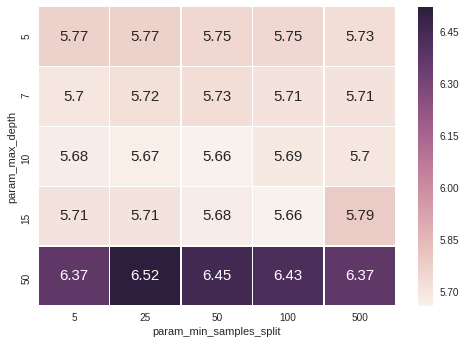

In [35]:
import seaborn as sns
sns.heatmap(test_score_heatmap,annot=True,annot_kws={"size": 15}, fmt='g',linewidths=.3)

In [36]:
print(model.best_estimator_)#printing the best_estimator

DecisionTreeClassifier(class_weight={1: 0.5, 0: 0.5}, criterion='gini',
            max_depth=10, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=50,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [0]:
dt=DecisionTreeClassifier(criterion='gini', splitter='best',class_weight={1:.5,0:.5},min_samples_split=50,max_depth=10)
dt.fit(train_bow,y_train)#fitting the model 

# FROM THE ABOVE HEATMAPS RESULTS FOR  CV DATA,WE FOUND THAT BEST HYPERPARAMETERS AS MAX_DEPTH=10 AND MIN_SAMPLE_SPLIT=50

# PLOTTING THE ROC CURVE FOR GETTING AUC SCORE

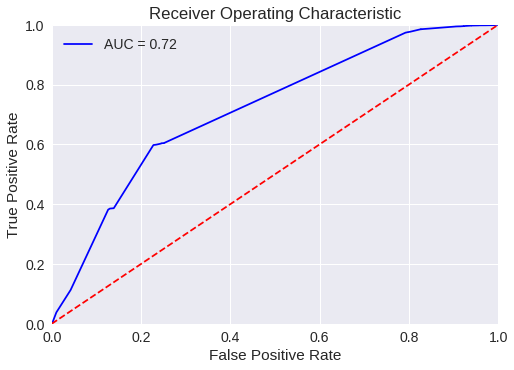

In [47]:
probs = model.predict_proba(test_bow)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# 
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'best')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [49]:
print('accuracy from the ROC curve is found as ',roc_auc*100)

accuracy from the ROC curve is found as  71.88677795729427


# VISUALIZING DECISION TREE WITH GRAPHVIZ,FOR PLOTTING PURPOSE TAKING MAX_DEPTH AS 3

In [37]:
dt=DecisionTreeClassifier(criterion='gini', splitter='best',class_weight={1:.5,0:.5},min_samples_split=10,max_depth=3)
dt.fit(train_bow,y_train)#fitting the model

DecisionTreeClassifier(class_weight={1: 0.5, 0: 0.5}, criterion='gini',
            max_depth=3, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

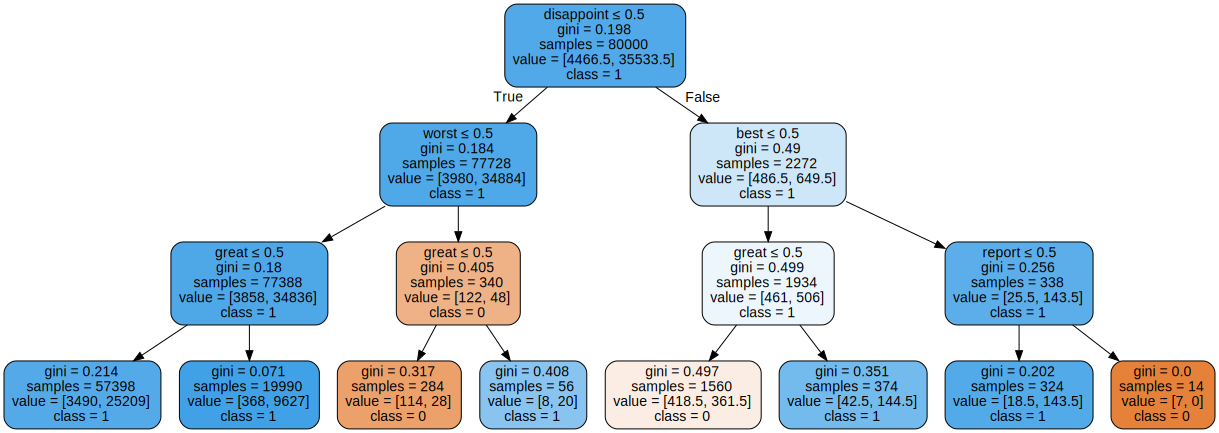

In [38]:
import graphviz 
target=['0','1']
dot_data = tree.export_graphviz(dt,out_file=None,feature_names=vectorizer.get_feature_names(),class_names=target,filled=True,rounded=True,special_characters=True) 
graph = graphviz.Source(dot_data)
graph

In [39]:
graph.render("gdrive/My Drive/decision_tree_bow") 

'gdrive/My Drive/decision_tree_bow.pdf'

In [40]:
print(dt.feature_importances_)#weight vector of features

[0. 0. 0. ... 0. 0. 0.]


In [41]:
dt=DecisionTreeClassifier(criterion='gini', splitter='best',class_weight={1:.5,0:.5},min_samples_split=50,max_depth=10)
dt.fit(train_bow,y_train)#fitting the model 
z=dt.feature_importances_
a=z.argsort()
print('shape of wieght vector is:',a.shape)
top_features=np.take(vectorizer.get_feature_names(),a[17180:])#taking last features as they are of very high importance 

shape of wieght vector is: (17204,)


In [42]:
print(top_features)#printing the top_features
top=list(top_features)

['box' 'pinhead' 'horribl' 'back' 'notifi' 'stale' 'compani' 'tasti' 'aw'
 'favorit' 'flatul' 'unfortun' 'safeti' 'wast' 'return' 'love' 'delici'
 'money' 'threw' 'terribl' 'best' 'worst' 'great' 'disappoint']


# REPRESENTING TOP IMPORTANT FEATURES USING WORDCLOUD LIBRARY

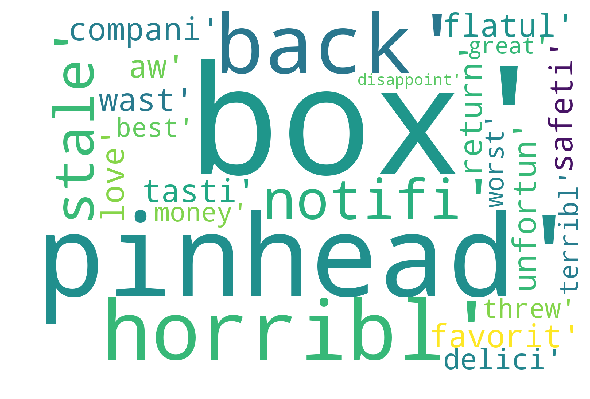

In [43]:
from wordcloud import WordCloud #here we are printing the top features using wordcloud library
import matplotlib.pyplot as plt
wordcloud = WordCloud(width = 1500, height = 1000, 
                background_color ='white', 
                 
                min_font_size = 10).generate(str(top)) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

# TESTING OUR MODEL ON TEST DATA AND CHECKING ITS PRECISION ,RECALL ,F1_FCORE

Accuracy on test set: 88.120%
Precision on test set: 0.890
Recall on test set: 0.986
F1-Score on test set: 0.935
Confusion Matrix of test set:
 [ [TN  FP]
 [FN TP] ]



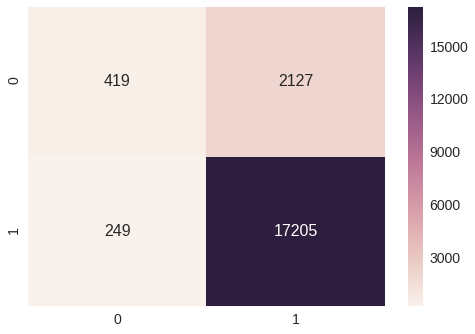

In [44]:
#Testing Accuracy on Test data  
import seaborn as sns #importing seaborn as sns
from sklearn.metrics import *#importing varoius metrics from sklearn
#building the model
dt=DecisionTreeClassifier(criterion='gini', splitter='best',class_weight={1:.5,0:.5},min_samples_split=50,max_depth=10)
dt.fit(train_bow,y_train)#fitting the model
y_pred = dt.predict(test_bow) 
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))#printing accuracy
print("Precision on test set: %0.3f"%(precision_score(y_test, y_pred)))#printing precision score
print("Recall on test set: %0.3f"%(recall_score(y_test, y_pred))) #printing recall
print("F1-Score on test set: %0.3f"%(f1_score(y_test, y_pred))) 
print("Confusion Matrix of test set:\n [ [TN  FP]\n [FN TP] ]\n") 
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2)) #generating the heatmap for confusion matrix
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')


# BOW VECTORIZATION FOR DECISION TREE IS COMPLETED 

In [0]:
#bow vertorization is completed for decision_trees